准备工作：运行脚本，安装必要的python包

1.在命令行界面，跳转到 CluBearSmartVendor 文件夹目录下（能看到脚本 libs_preparation.sh ）

输入如下命令并回车，赋予脚本执行权限：

**chmod +x libs_preparation.sh**

2.在命令行输入如下命令并回车，运行脚本，自动安装需要的库

**./libs_preparation.sh**

过程中会弹出确认选项 Proceed ([y]/n)? 这时需要确认，输入 y 并回车


执行完毕即可正常import csv包

In [1]:
import time
import pandas as pd
from matplotlib import pyplot as plt


import CluBearSmartVendor as csv # 引入CSV包

All classifiers are compiled


In [2]:
# * 若环境中有多个python版本，可用该方法指定使用哪个python执行器。
# * 输入为指定python执行器的路径
# * 矩池云pytorch机器上不需要做该调整。该命令执行、不执行都可以。已经将代码包中的该路径设置为矩池云机器上正确的python执行器路径
csv.set_global_python_path('/root/miniconda3/envs/myconda/bin/python')

In [3]:
# 示例视频路径
video_path = '/database/datasets/SmartVender/SmartVending-2/202306082354124289120011852_000009_record1.mp4'

t0 = time.time() # 计时

# 对输入视频提取信息
# 返回：
# features - 识别的特征，类型为列表； 
# img - 识别目标的图片
[features, img] = csv.extract(video_path) 

t1 = time.time() # 计时
print('%.4fs' % (t1-t0))

Start detecting ...
Detection finished. (20.6868s)


All classifications finished. 8.5695s
29.5793s


In [4]:
# 返回的features结果为单行列表，可以方便地做成dataframe
# csv.result_names 是输出字段列表
res = pd.DataFrame([features], columns=csv.result_names) 
res

,easy_case,size,edge,waistline,waisted,striped,cap,bottle,belt,liquid
0,是,大,无棱线,无腰线,不收腰,无条纹,无瓶盖,易拉罐,其他,透明


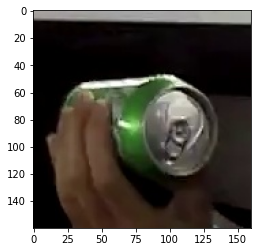

In [5]:
# 展示图片
plt.imshow(img)

In [6]:
# 若需要返回概率值，可通过 is_prob=True 打开集成分类器的开关
# 返回：
# features - 识别的特征，类型为列表；
# prib - 各个特征对应的概率值，类型为列表; 
# img - 识别目标的图片

[features, prob, img] = csv.extract(video_path, is_prob=True)

# 结果为列表，可以方便地做成dataframe
# csv.result_names 是输出字段列表
res = pd.DataFrame([features, prob], columns=csv.result_names) 
res

Start detecting ...
Detection finished. (21.6279s)


All classifications finished. 8.3705s


,easy_case,size,edge,waistline,waisted,striped,cap,bottle,belt,liquid
0,是,大,无棱线,无腰线,不收腰,无条纹,无瓶盖,易拉罐,其他,透明
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999985,1.0,0.9761
